In [1]:
#pip install missingno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
import sklearn
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import missingno as msno

In [2]:
sklearn.set_config(display='diagram')

In [29]:
df = pd.read_csv('datos_compresores.csv', sep='|', parse_dates=['datetime'], index_col='datetime')
df.head()

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
len(df.columns)

59

# Exploratory Data Analysis

First let's analyze basic information about the data. We are going to see the **statistics**, the **distribution plot**, the **time series plot** and the **correlation matrix** of the variables.

In [31]:
df.shape

(18361, 59)

In [32]:
df.describe()

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
count,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18064.000000,18062.000000,18064.000000,...,18064.000000,18064.000000,18064.000000,18102.000000,18064.000000,18064.000000,18064.000000,18064.000000,8864.000000,305.000000
mean,1307.652624,76.494852,31.217333,891.583426,803.715954,26.683996,145.132007,16.879167,67.548854,38.842504,...,0.219492,50.847487,166.321523,96.088278,214.585861,91.950565,164.222487,225.675321,129.403683,1166.633326
std,235.247624,10.559201,3.794971,154.800916,143.202942,2.898937,9.765803,0.601502,15.348331,5.087252,...,0.444181,23.191016,69.298882,23.229248,36.004377,26.686883,15.983648,34.028685,7.088857,15.997491
min,0.000000,0.000000,27.299999,63.000000,0.000000,0.000000,61.520000,13.561050,35.599998,0.000000,...,0.000000,19.000000,0.000000,53.000000,-102.000000,0.000000,57.000000,0.000000,0.559280,1057.113037
25%,1305.500000,74.000000,30.299999,919.000000,832.000000,24.700001,136.940002,16.896931,59.000000,39.000000,...,0.100000,44.000000,162.000000,90.000000,212.000000,81.000000,160.000000,224.000000,127.332100,1167.349976
50%,1351.500000,78.000000,31.100000,926.000000,834.000000,27.000000,144.500000,16.969450,62.599998,40.000000,...,0.100000,47.000000,163.000000,95.000000,220.000000,90.000000,162.000000,235.000000,128.454895,1170.441040
75%,1397.000000,82.000000,31.600000,928.000000,840.000000,29.200001,149.720001,17.114479,73.400002,41.000000,...,0.200000,58.000000,172.000000,102.000000,231.000000,103.000000,171.000000,238.000000,130.202896,1173.150024
max,1430.000000,95.000000,100.199997,1043.000000,891.000000,29.700001,200.000000,17.332041,149.000000,100.000000,...,8.500000,2936.000000,2052.000000,2930.000000,261.000000,2935.000000,202.000000,268.000000,298.199799,1176.859985


In [33]:
df.isna().sum()

K-1303_Engine_RPM                                                 297
K-1303_Engine_Load_Factor                                         297
K-1303_Fuel_Gas_Pressure                                          297
K-1303_Pre_Catalyst_Temperature                                   297
K-1303_Post_Catalyst_Temperature                                  297
K-1303_Actual_Engine_Timing                                       297
K-1303_Inlet_Air_Temperature                                      297
K-1303_Fuel_Pressure_-_Absolute                                   297
K-1303_Engine_Fuel_Gas_Temperature                                299
K-1303_Fuel_Valve_Position                                        297
K-1303_Actual_Air_to_Fuel_Ratio                                   297
K-1303_Fuel_Valve_Differential_Pressure                           297
K-1303_Left_Bank_Turbine_Inlet_Temperature                        297
K-1303_Left_Bank_Turbine_Outlet_Temperature                       274
K-1303_Right_Bank_Tu

<AxesSubplot:>

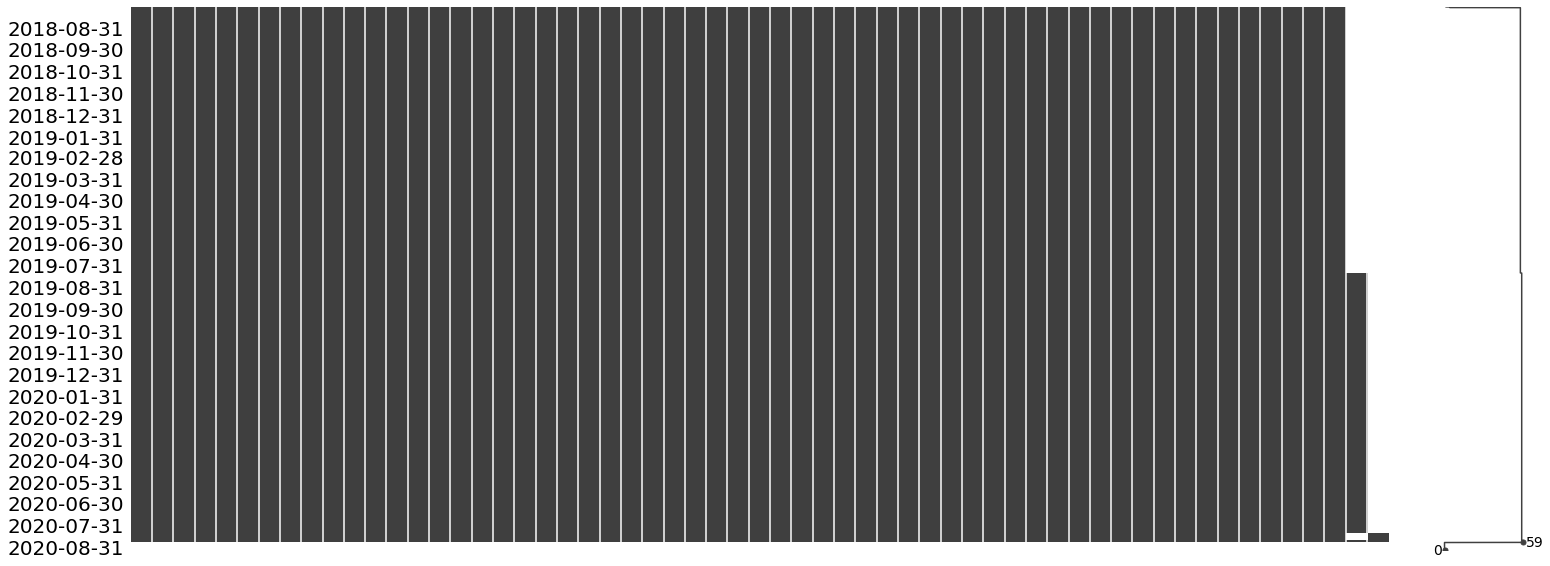

In [34]:
msno.matrix(df, freq='M')

It seems there are no structural missing values. The existing ones could be due sensors that are turned off at the begining and end of the periods.

In consequence, we are going to drop the row containing the missing values.

Just the columns "Train_1_Sales_Pressure" and "Train_1_Inlet_Separator_Pressure" show a disproportional number of missing values, so it is going to be dropped.'

In [35]:
df.drop(columns=['Train_1_Sales_Pressure', 'Train_1_Inlet_Separator_Pressure'], inplace=True)
df.dropna(inplace=True)

In [36]:
motor = df[['K-1303_Engine_RPM',
'K-1303_Engine_Drive_End_Vibration',
'K-1303_Engine_Non_Drive_End_Vibration',
'K-1303_Engine_Load_Factor',
'K-1303_Engine_Coolant_Temperature',
'K-1303_Oil_Filter_Differential_Pressure',
'K-1303_Engine_Oil_to_Engine_Coolant_Differential_Temperature',
'K-1303_Engine_Oil_Pressure',
'K-1303_Engine_Oil_Temperature',
'K-1303_Inlet_Air_Temperature',
'K-1303_Unfiltered_Engine_Oil_Pressure',
'K-1303_Intake_Manifold_Pressure_-_Absolute',
'K-1303_Cooler_Vibration',
'K-1303_Auxiliary_Water_Temperature',
'K-1303_Engine_Coolant_Pressure_-_Absolute']]

compressor = df[['K-1303_Engine_RPM',
'K-1303_Engine_Load_Factor',
'K-1303_Compressor_Drive_End_Vibration',
'K-1303_Compressor_Non_Drive_End_Vibration',
'K-1303_Compression_Cylinder_#1',
'K-1303_Tension_Cylinder_#1',
'K-1303_Suction_Downstream_Pressure',
'K-1303_Stage_1_Discharge_Pressure',
'K-1303_Compression_Cylinder_#2',
'K-1303_Tension_Cylinder_#2',
'K-1303_Stage_2_Discharge_Pressure',
'K-1303_Compression_Cylinder_#3',
'K-1303_Tension_Cylinder_#3',
'K-1303_Stage_3_Discharge_Pressure',
'K-1303_Compression_Cylinder_#4',
'K-1303_Tension_Cylinder_#4',
'K-1303_Compressor_Oil_Temperature',
'K-1303_Compressor_Oil_Pressure',
'K-1303_Inlet_Air_Temperature',
'K-1303_Auxiliary_Water_Temperature']]

motor_train = motor.loc['2019-09-05':'2020-09-04']
motor_test = motor.loc['2018-08-01':'2019-04-01']

compressor_train = compressor.loc['2019-09-05':'2020-09-04']
compressor_test = compressor.loc['2018-08-01':'2019-04-01']

In [13]:
motor.shape

(18062, 15)

In [14]:
compressor.shape

(18062, 20)

In [15]:
df.shape

(18062, 57)

In [16]:
df_cm = pd.merge(motor, compressor, right_index=True, left_index=True)

In [17]:
train = df_cm.loc['2019-09-05':'2020-09-04']
test = df_cm.loc['2018-08-01':'2019-04-01']

In [18]:
train.describe()

,K-1303_Engine_RPM_x,K-1303_Engine_Drive_End_Vibration,K-1303_Engine_Non_Drive_End_Vibration,K-1303_Engine_Load_Factor_x,K-1303_Engine_Coolant_Temperature,K-1303_Oil_Filter_Differential_Pressure,K-1303_Engine_Oil_to_Engine_Coolant_Differential_Temperature,K-1303_Engine_Oil_Pressure,K-1303_Engine_Oil_Temperature,K-1303_Inlet_Air_Temperature_x,...,K-1303_Stage_2_Discharge_Pressure,K-1303_Compression_Cylinder_#3,K-1303_Tension_Cylinder_#3,K-1303_Stage_3_Discharge_Pressure,K-1303_Compression_Cylinder_#4,K-1303_Tension_Cylinder_#4,K-1303_Compressor_Oil_Temperature,K-1303_Compressor_Oil_Pressure,K-1303_Inlet_Air_Temperature_y,K-1303_Auxiliary_Water_Temperature_y
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,...,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.00000
mean,1299.227241,0.402971,0.375847,75.513879,193.739589,13.082498,28.769160,65.750893,191.535427,148.332322,...,556.136709,378.247471,12409.769466,1194.528134,22723.822630,20463.176900,168.269231,63.150976,148.332322,121.02423
std,229.455218,0.047160,0.052721,14.010608,8.626867,1.106816,7.720517,5.420120,8.919369,9.827804,...,113.315021,53.016176,2521.571462,310.733419,5764.451832,4804.072118,14.652420,13.235697,9.827804,23.39931
min,0.000000,0.000000,0.000000,0.000000,73.400002,0.000000,-100.000000,0.000000,84.199997,61.520000,...,0.000000,0.000000,-510.000000,2.500000,-710.000000,-1410.000000,-111.000000,0.000000,61.520000,61.00000
25%,1256.500000,0.380000,0.340000,71.000000,190.399994,12.690830,30.200001,65.339622,190.399994,143.240005,...,547.000000,370.000000,12320.000000,1227.800049,21890.000000,19450.000000,167.250000,65.000000,143.240005,116.00000
50%,1371.000000,0.410000,0.390000,80.000000,192.199997,13.198460,30.200001,66.282356,192.199997,147.559998,...,596.900024,380.000000,13110.000000,1292.500000,24470.000000,21770.000000,170.000000,66.000000,147.559998,122.00000
75%,1395.000000,0.430000,0.410000,84.000000,195.800003,13.633570,32.000000,67.297630,195.800003,152.240005,...,608.000000,390.000000,13490.000000,1335.000000,25000.000000,22270.000000,173.000000,66.699997,152.240005,127.00000
max,1430.000000,0.530000,0.630000,95.000000,217.399994,16.606850,53.599998,87.312866,215.600006,200.000000,...,729.900024,890.000000,14590.000000,1350.300049,36580.000000,34550.000000,188.000000,81.800003,200.000000,2052.00000


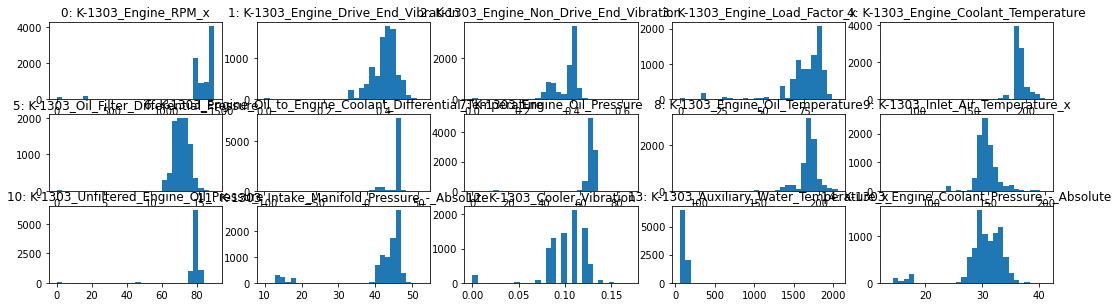

In [19]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 14:
        ax.set_visible(False)
        continue
    ax.hist(train.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, train.columns[i]))

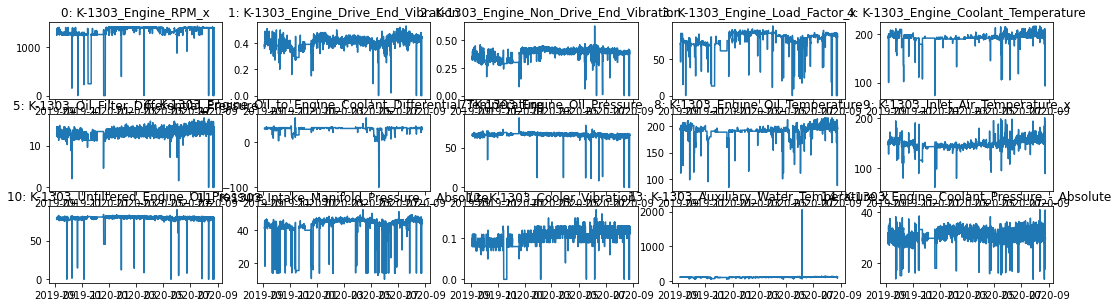

In [20]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 14:
        ax.set_visible(False)
        continue
    ax.plot(train.iloc[:, i])
    ax.set_title("{}: {}".format(i, train.columns[i]))

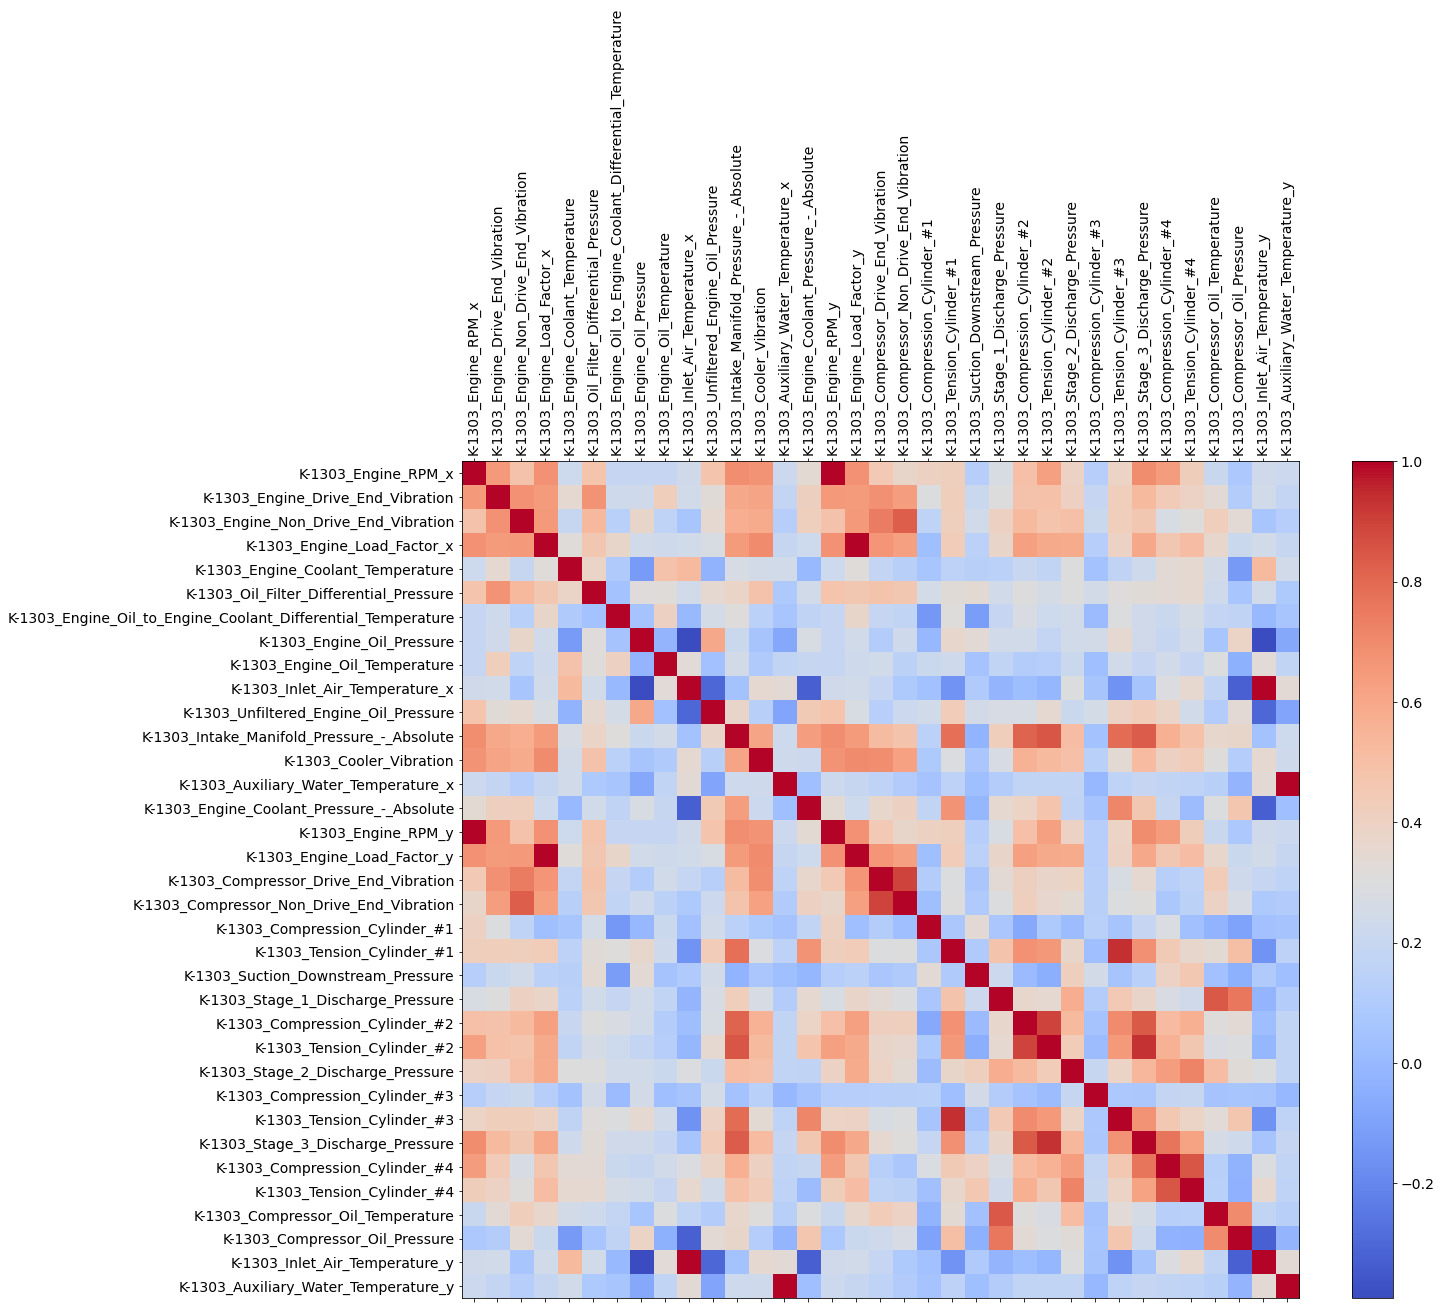

In [21]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=90)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [22]:
def winsor(serie):
    return winsorize(serie, limits=[0.001, 0.001])
winsor = FunctionTransformer(winsor)

In [23]:
simple = SimpleImputer()
robust = RobustScaler()

In [24]:
processing = Pipeline([
    ('scaler', robust),
    ('out', winsor)
])
processing

Pipeline(steps=[('scaler', RobustScaler()),
                ('out',
                 FunctionTransformer(func=<function winsor at 0x120ba90d0>))])

Text(0.5, 1.0, 'Train')

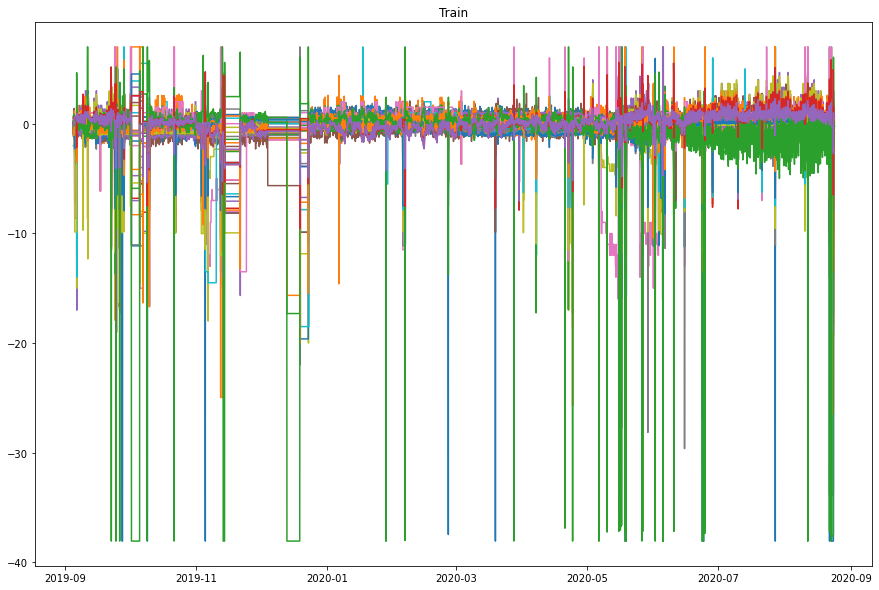

In [25]:
plt.figure(figsize=(15,10))
plt.plot(train.index, processing.fit_transform(train))
plt.title('Train')

Text(0.5, 1.0, 'Test')

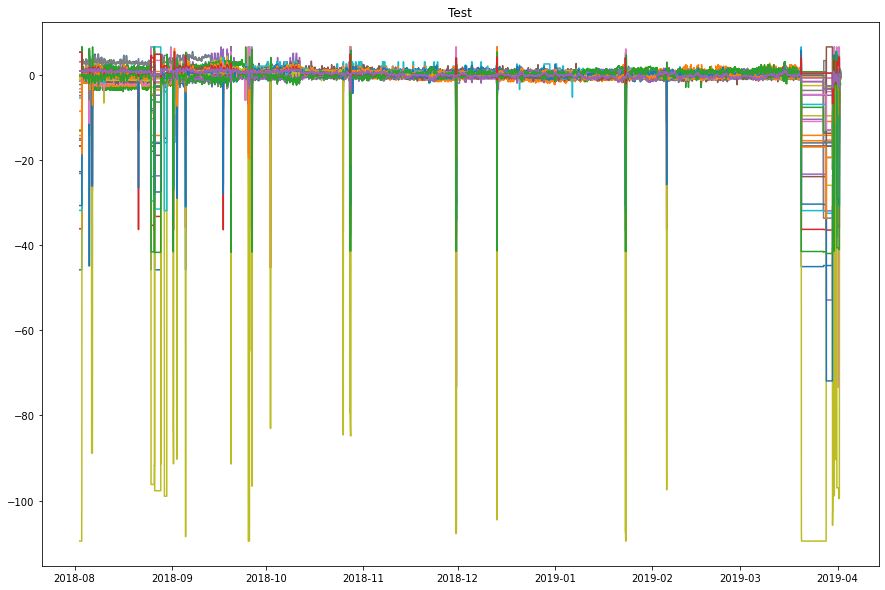

In [26]:
plt.figure(figsize=(15,10))
plt.plot(test.index, processing.fit_transform(test))
plt.title('Test')

# PCA

Now we are going to applied a PCA to evaluate if we can detect the anomalies using less dimensions.

We are going to build a pipeline with a simple imputer using the median and a robust scaler previous to the PCA.

In [28]:
len(train.columns)

35

In [25]:
pca = PCA()

In [26]:
pca_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('out', winsor),    
    ('pca', pca)
])
pca_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('out',
                 FunctionTransformer(func=<function winsor at 0x000001BCA39BFB80>)),
                ('pca', PCA())])

In [27]:
pc_train = pd.DataFrame(pca_pipeline.fit_transform(train))

In [28]:
var = pd.DataFrame(pca.explained_variance_ratio_)
pca_cum = np.cumsum(var)

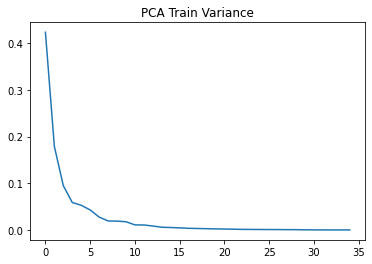

Text(0.5, 1.0, 'PCA Train Variance Cummulative')

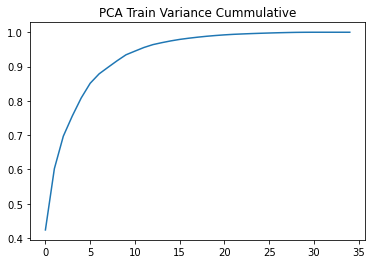

In [29]:
plt.plot(var)
plt.title('PCA Train Variance')
plt.show()

plt.plot(pca_cum)
plt.title('PCA Train Variance Cummulative')


In [30]:
pca_cum.head()

,0
0,0.423451
1,0.602113
2,0.696875
3,0.755604
4,0.808377


In [31]:
pc_test = pd.DataFrame(pca_pipeline.transform(test))

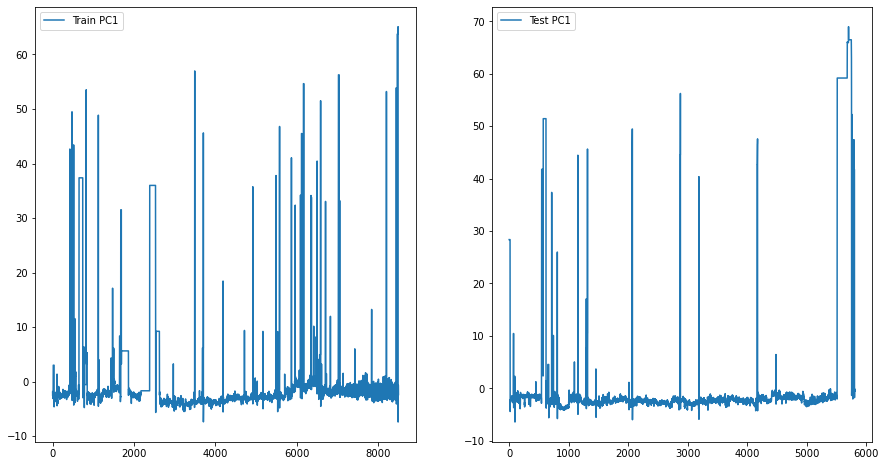

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].plot(pc_train[0], label='Train PC1')
ax[1].plot(pc_test[0], label ='Test PC1')
ax[0].legend()
ax[1].legend()

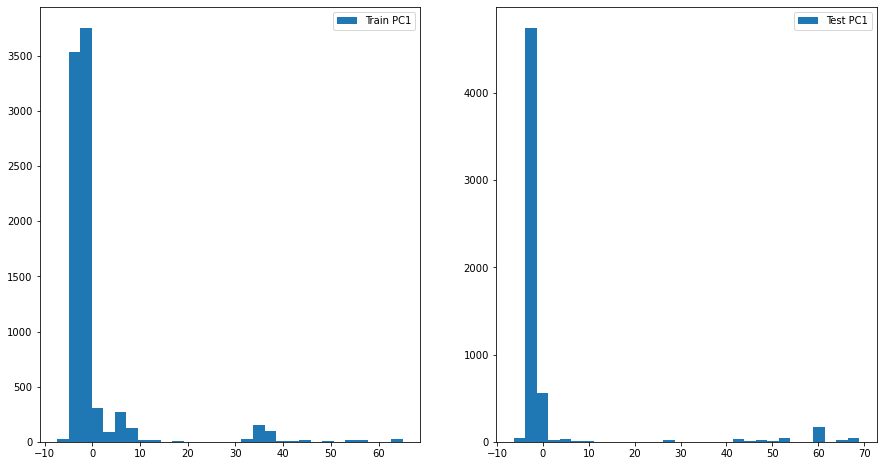

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
ax[0].hist(pc_train[0], bins=30, label='Train PC1')
ax[1].hist(pc_test[0], bins=30, label ='Test PC1')
ax[0].legend()
ax[1].legend()

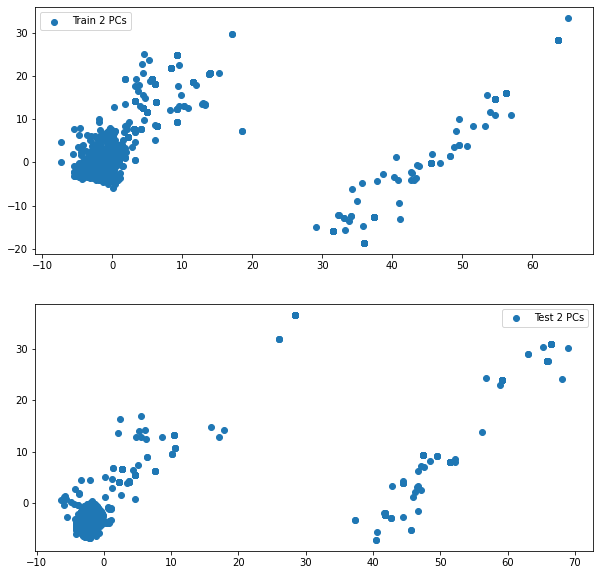

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax[0].scatter(pc_train[0], pc_train[1], label='Train 2 PCs')
ax[1].scatter(pc_test[0], pc_test[1], label ='Test 2 PCs')
ax[0].legend()
ax[1].legend()

Text(0.5, 0.92, 'Three PC Train')

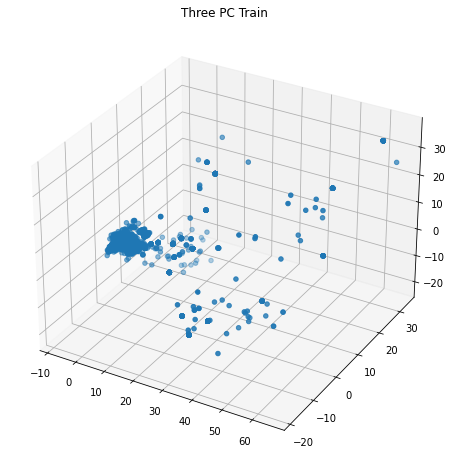

In [35]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection ='3d')
ax.scatter(pc_train[0], pc_train[1], pc_train[2])
plt.title('Three PC Train')

Text(0.5, 0.92, 'Three PC Test')

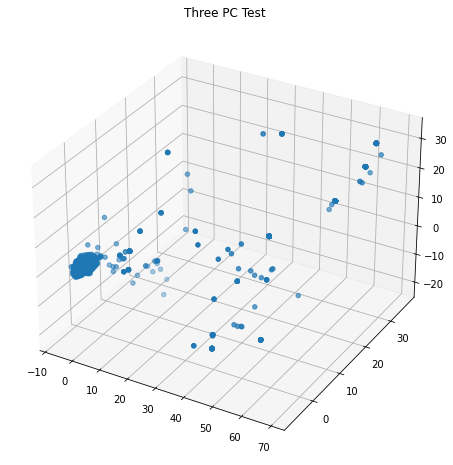

In [36]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection ='3d')
ax.scatter(pc_test[0], pc_test[1], pc_test[2])
plt.title('Three PC Test')

Text(0.5, 1.0, 'Cluster of the PCs in the entire dataset')

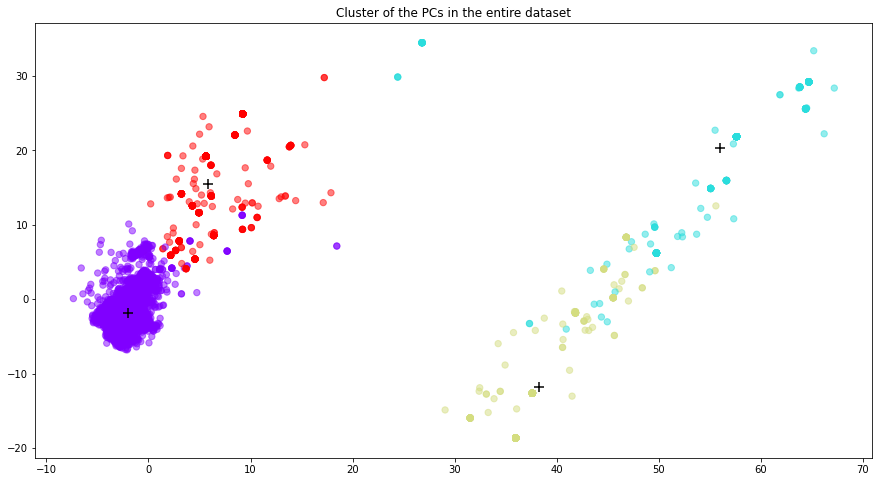

In [37]:
pc_full = pd.DataFrame(pca_pipeline.transform(df_cm))

kmeans = KMeans(n_clusters=4)
kmeans.fit(pc_full)

pc_full['label'] = kmeans.labels_

plt.figure(figsize=(15,8))
plt.scatter(pc_full[0],pc_full[1], c=kmeans.labels_, cmap='rainbow', s = 40, marker = 'o',alpha = 0.5);
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker = '+', s = 100)

plt.title('Cluster of the PCs in the entire dataset')

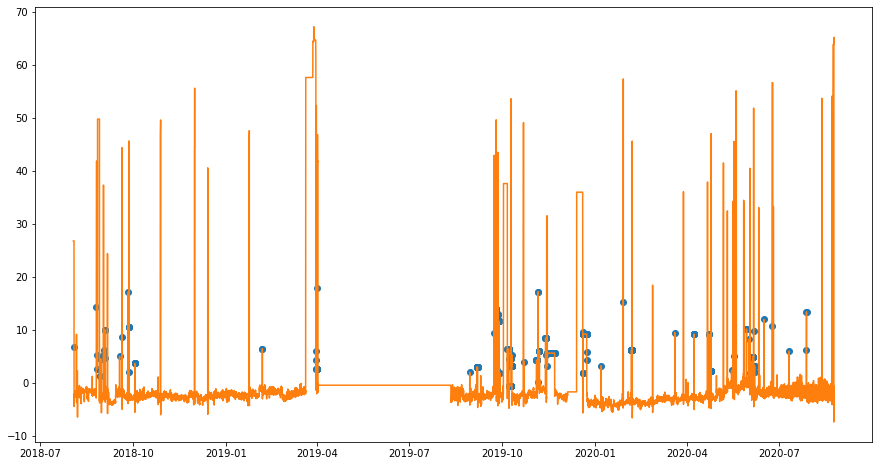

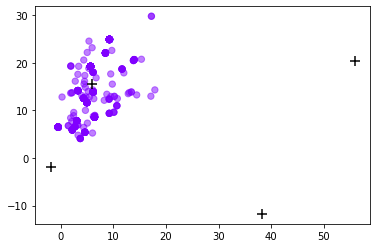

In [38]:
pc_full.set_index(df_cm.index, inplace=True)

pc_anomalies = pc_full[pc_full['label']==3]

plt.figure(figsize=(15,8))
plt.plot(pc_anomalies[0], marker='o', linestyle='')
plt.plot(pc_full[0])

plt.show()

plt.scatter(pc_anomalies[0],pc_anomalies[1], c=pc_anomalies['label'], cmap='rainbow', s = 40, marker = 'o',alpha = 0.5);
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker = '+', s = 100)


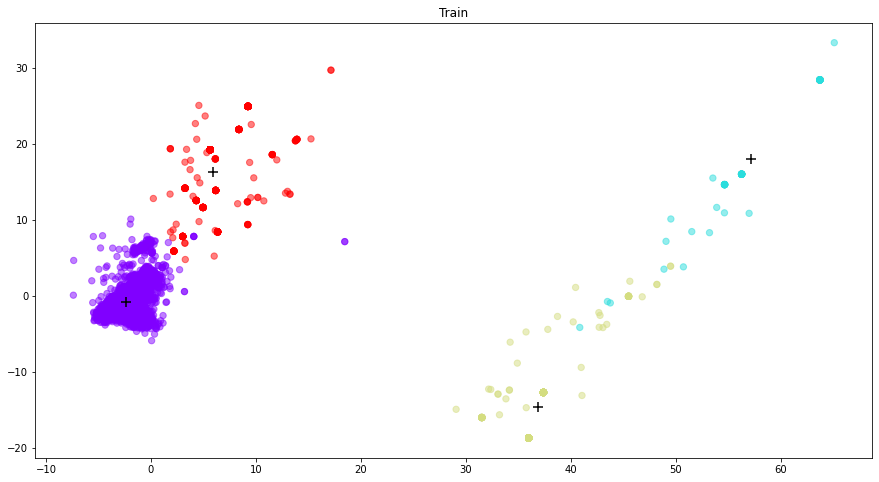

Text(0.5, 1.0, 'Test')

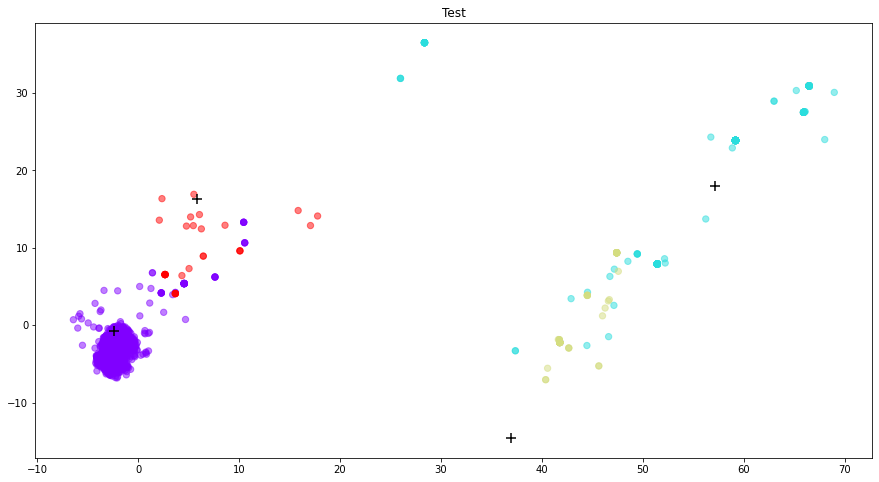

In [39]:
kmeans.fit(pc_train)

pc_train['label'] = kmeans.labels_

pc_test = pd.DataFrame(pca_pipeline.transform(test))

pc_test['label'] = kmeans.predict(pc_test)

plt.figure(figsize=(15,8))
plt.scatter(pc_train[0],pc_train[1], c=pc_train['label'], cmap='rainbow', s = 40, marker = 'o',alpha = 0.5);
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker = '+', s = 100)
plt.title('Train')

plt.show()

plt.figure(figsize=(15,8))
plt.scatter(pc_test[0],pc_test[1], c=pc_test['label'], cmap='rainbow', s = 40, marker = 'o',alpha = 0.5);
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker = '+', s = 100)
plt.title('Test')

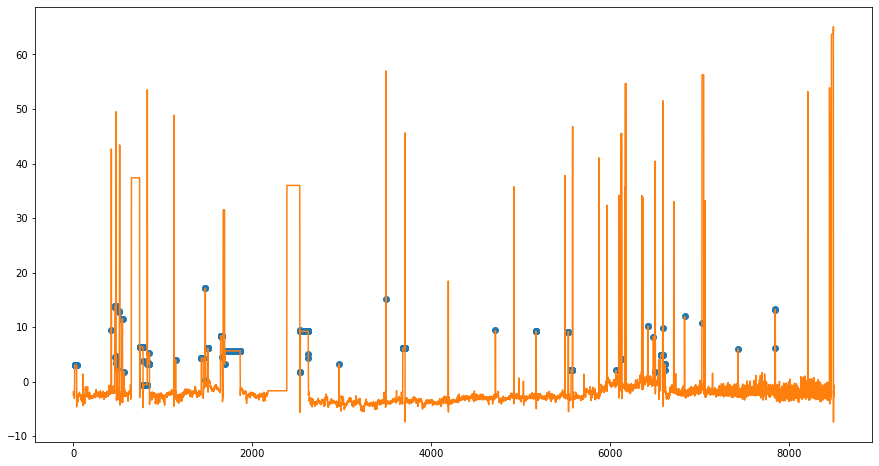

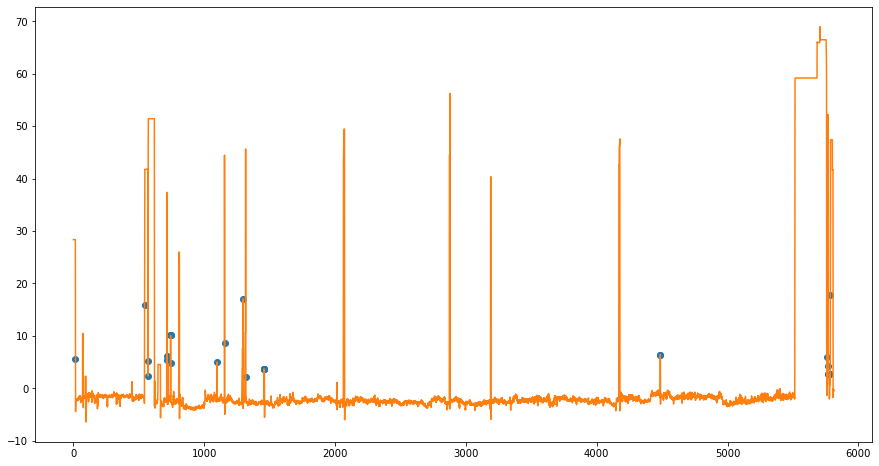

In [40]:
pc_anomalies_train = pc_train[pc_train['label']==3]
pc_test_anomalies = pc_test[pc_test['label']==3]

plt.figure(figsize=(15,8))
plt.plot(pc_anomalies_train[0], marker='o', linestyle='')
plt.plot(pc_train[0])

plt.show()

plt.figure(figsize=(15,8))
plt.plot(pc_test_anomalies[0], marker='o', linestyle='')
plt.plot(pc_test[0])

# Models

In [93]:
onesvm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.001)
clf = IsolationForest()

In [42]:
pipeline = Pipeline([
    ('imputer', simple),
    ('scaler', robust),
    ('out', winsor),
    ('pca', pca),
    ('model', onesvm)
])
pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', RobustScaler()),
                ('out',
                 FunctionTransformer(func=<function winsor at 0x000001BCA39BFB80>)),
                ('pca', PCA()), ('model', OneClassSVM(gamma=0.01, nu=0.001))])

# One-Class SVM

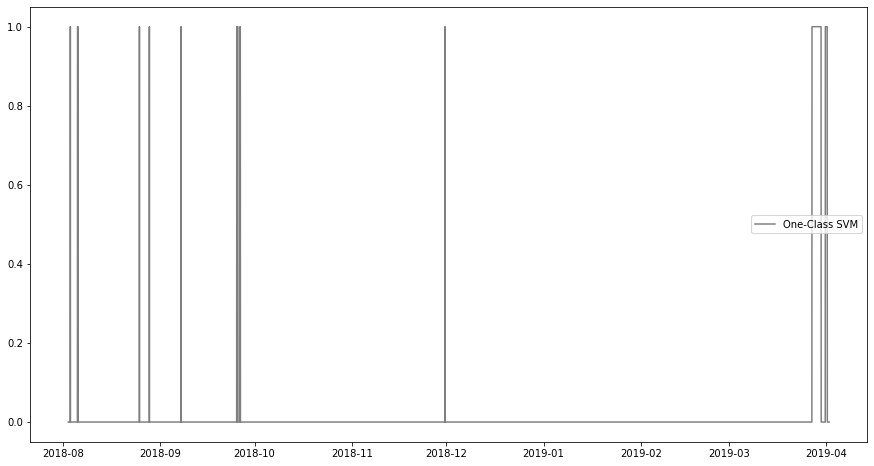

In [61]:
params_one_class = {'model': onesvm, 'pca': None, 'model__gamma': 0.00001, 'model__nu': 0.001}

pipeline.set_params(**params_one_class)

pipeline.fit(train)
one_class = pd.DataFrame(pipeline.predict(test)).replace(1,0).replace(-1,1).set_index(test.index)

plt.figure(figsize=(15,8))
plt.plot(one_class, color='black', alpha=0.5, label='One-Class SVM')

plt.legend()

## One-Class SVM with PCA

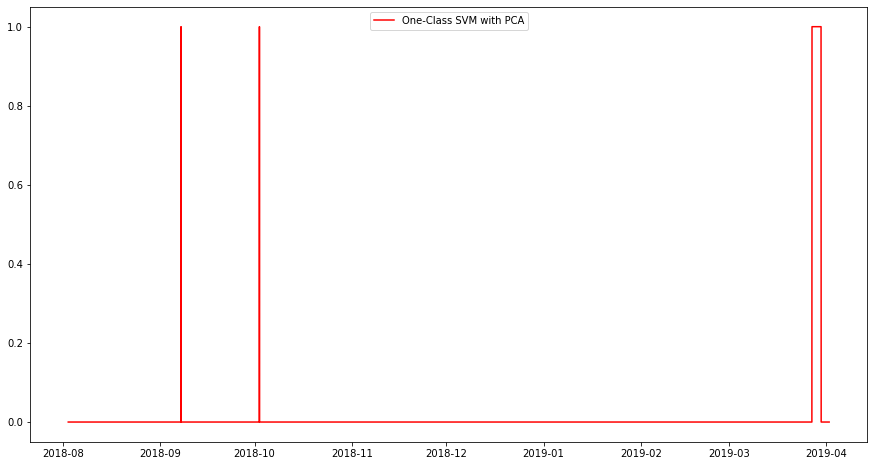

In [122]:
params_one_class_pca = {'model': onesvm, 'pca': pca, 'pca__n_components': 2, 'model__gamma': 0.0001, 'model__nu': 0.001}

pipeline.set_params(**params_one_class_pca)

pipeline.fit(train)

pca_one_class_test = pd.DataFrame(pipeline.predict(test)).replace(1,0).replace(-1,1).set_index(test.index)

plt.figure(figsize=(15,8))

plt.plot(pca_one_class_test, color='r', label='One-Class SVM with PCA')

plt.legend()

## Isolation Forest

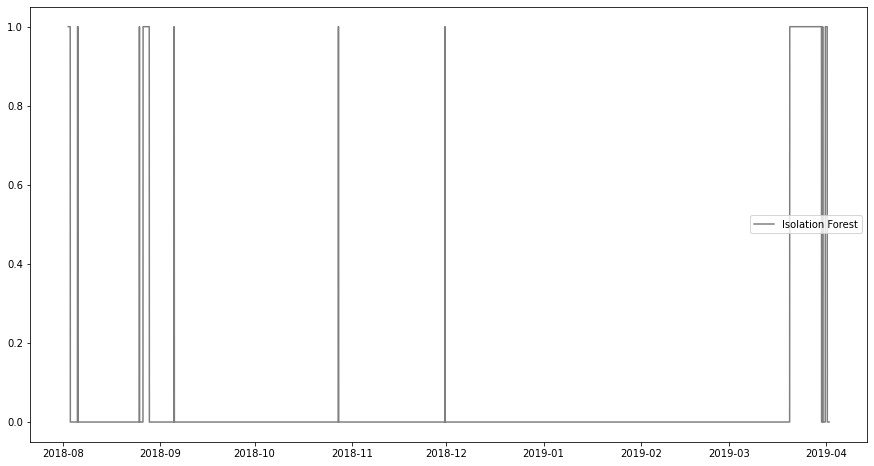

In [109]:
params_isolation = {'model': clf, 'model__contamination': 0.008, 'pca__n_components': 4}

pipeline.set_params(**params_isolation)

pipeline.fit(train)

isol_pred_test = pd.DataFrame(pipeline.predict(test)).replace(1,0).replace(-1,1).set_index(test.index)

plt.figure(figsize=(15,8))
plt.plot(isol_pred_test, color='black', alpha=0.5, label='Isolation Forest')

plt.legend()

importance of the sensors!

# Visualization of the anomalies

Text(0.5, 1.0, 'All the models')

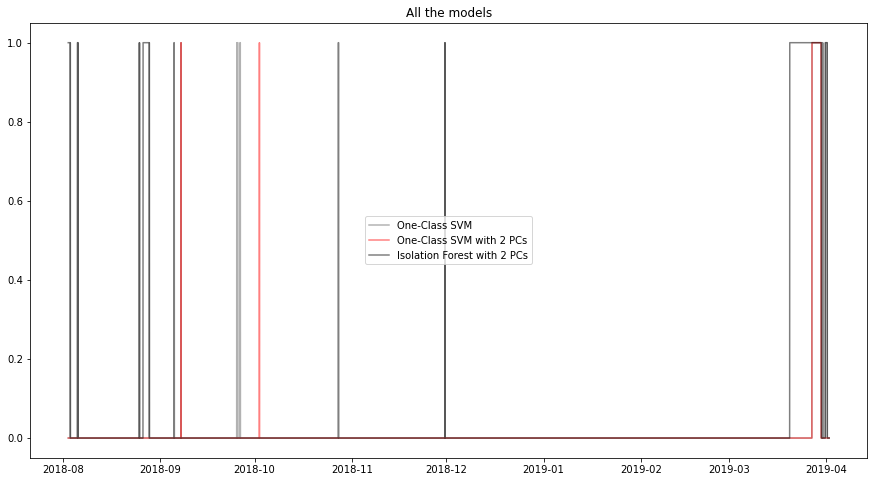

In [124]:
plt.figure(figsize=(15,8))

plt.plot(one_class, color='black', alpha=0.3, label='One-Class SVM')
plt.plot(pca_one_class_test, color='r', label='One-Class SVM with 2 PCs', alpha=0.5)
plt.plot(isol_pred_test, color='black', label='Isolation Forest with 2 PCs', alpha=0.5)

plt.legend()

plt.title('All the models')

Text(0.5, 1.0, 'Anomalies in test')

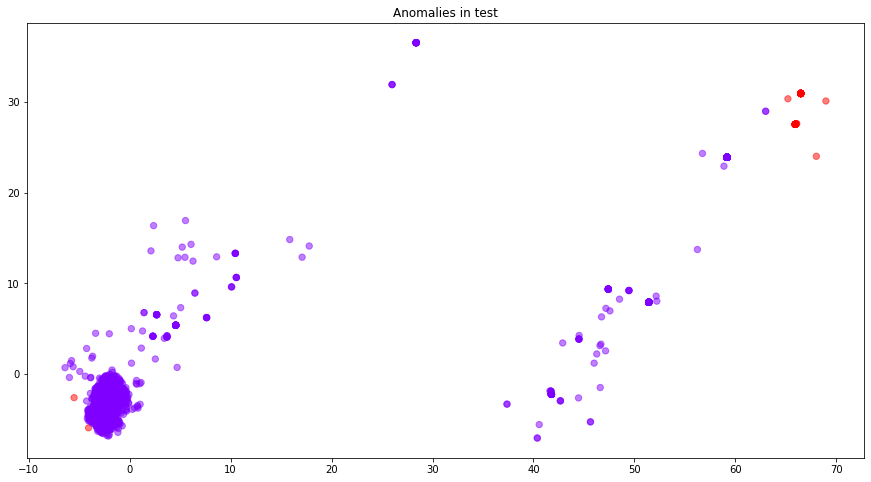

In [123]:
plt.figure(figsize=(15,8))
plt.scatter(pc_test[0],pc_test[1], c=pca_one_class_test, cmap='rainbow', s = 40, marker = 'o',alpha = 0.5);
plt.title('Anomalies in test')